<h3> Sales Analysis.


In [ ]:
#importing necessary libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#connecting drive to access the dataset 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the dataset 
data = pd.read_csv("/content/drive/MyDrive/Intership/Task 3/SampleSuperstore.csv")

In [ ]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#checking for null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#Checking for no.of types in each column.
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
#Checking for null values. 
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
#Removing unecessary columns from the data.
data = data.drop(["Country","Postal Code"], axis=1)

In [ ]:
data.tail()


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,Westminster,California,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


- **<h4>Finding out Segment.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


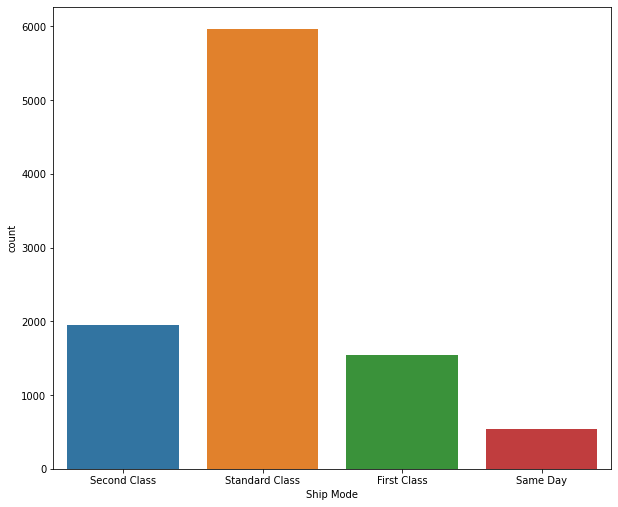

In [ ]:
#Getting more info from each category.
plt.figure(figsize= (10,8.5))
sns.countplot(data["Ship Mode"])


In [ ]:
b = pd.DataFrame((data.groupby(["Ship Mode"]).size().reset_index(name = "Count")))
print(b)

        Ship Mode  Count
0     First Class   1538
1        Same Day    543
2    Second Class   1945
3  Standard Class   5968


 
- **<h4>So we can see Standard Class is the highest preffered class among the consumers.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


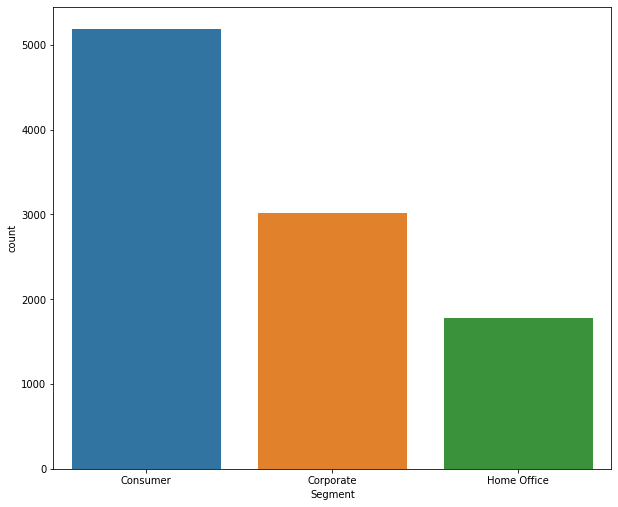

In [ ]:
plt.figure(figsize= (10,8.5))
sns.countplot(data["Segment"])

- **<h4>Most of the Customers are form Consumer Segment.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


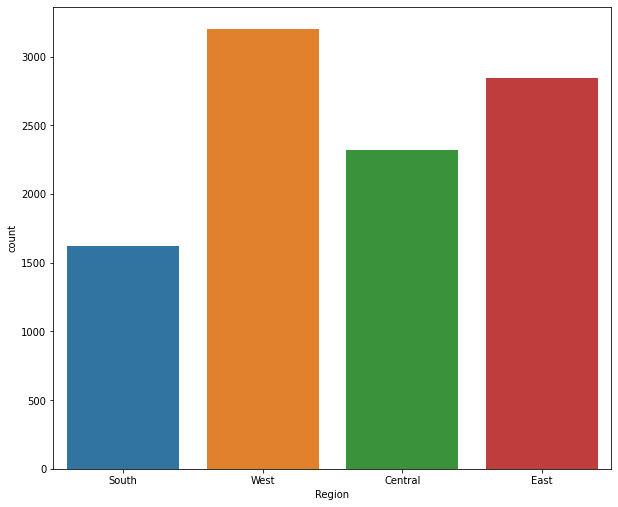

In [ ]:
plt.figure(figsize= (10,8.5))
sns.countplot(data["Region"])

- **<h4>Most number of customers are from west.**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f947539b0>,
      dtype=object)

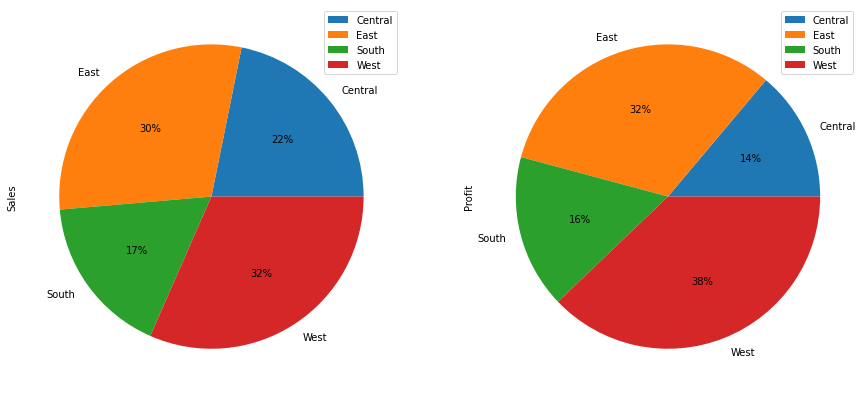

In [ ]:
Region_Sales = pd.DataFrame(data.groupby("Region").agg({"Sales":"sum", "Profit":"sum"}))
Region_Sales.plot(kind = "pie", subplots = True, figsize = (15,15), autopct = "%0.0f%%")

- **<h4>Most Sales is from West and so the profit** 

- **<h4>Almost 62% of Sales & 70% profit came from WEST and EAST**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


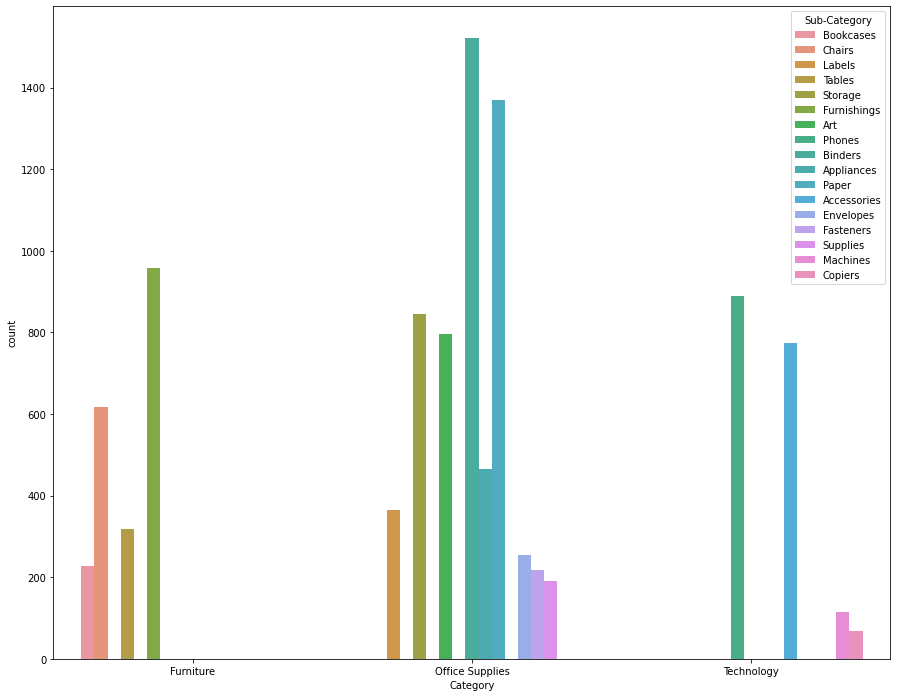

In [ ]:
plt.figure(figsize= (15,12))
sns.countplot("Category", hue = "Sub-Category", data = data)

- **In Furniture Category Bookcases are is Least bought product**

- **In Office Category Binders are the most bought product**

- **In Technology Phones are the most sold product**

**<h4>Which are the top 10 products by Sales.**

In [ ]:
#Grouping sub category and sum sales
prod_sales=pd.DataFrame(data.groupby("Sub-Category").sum()["Sales"])

In [ ]:
prod_sales = prod_sales.sort_values("Sales",ascending = False)

In [ ]:
prod_sales[:10]

,Sales
Sub-Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


 
- **Most Sales was in Phones Category but the quantity of Phones sold is 4th.**

In [ ]:
prod_sales.tail(5)

,Sales
Sub-Category,
Supplies,46673.538
Art,27118.792
Envelopes,16476.402
Labels,12486.312
Fasteners,3024.280


- **<h4>Top 2 Segements with Highest Sales:**

**<h4>Most Selling Product (Quantity)**


In [ ]:
prod_quantity = pd.DataFrame(data.groupby("Sub-Category").sum()["Quantity"])

In [ ]:
prod_quantity = prod_quantity.sort_values("Quantity", ascending=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


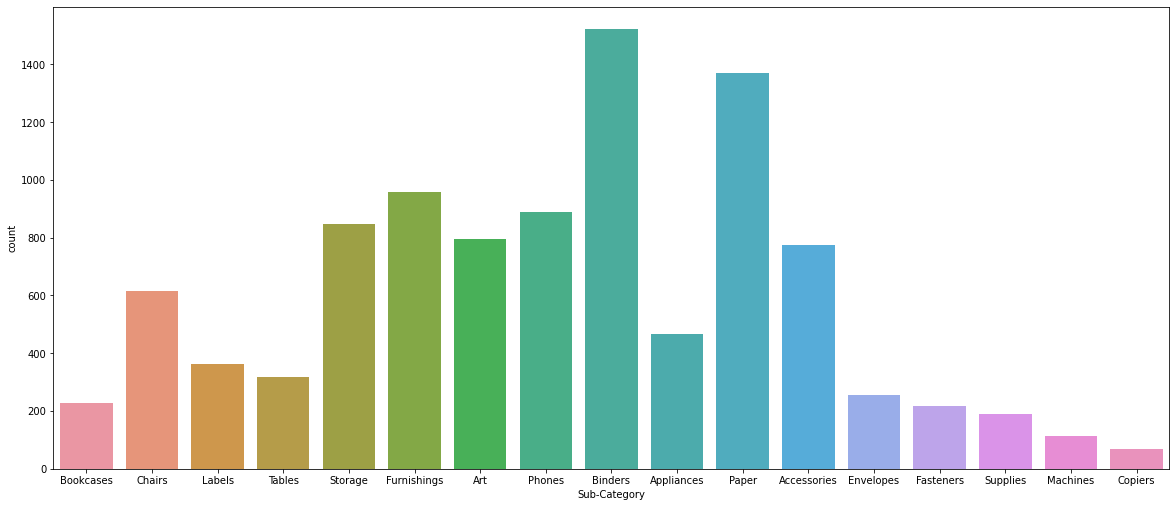

In [ ]:
plt.figure(figsize= (20,8.5))
sns.countplot(data["Sub-Category"])

In [ ]:
prod_quantity[:10]

,Quantity
Sub-Category,
Binders,5974
Paper,5178
Furnishings,3563
Phones,3289
Storage,3158
Art,3000
Accessories,2976
Chairs,2356
Appliances,1729


- **<h4>Here are the total quantity of top 10 products sold.** 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


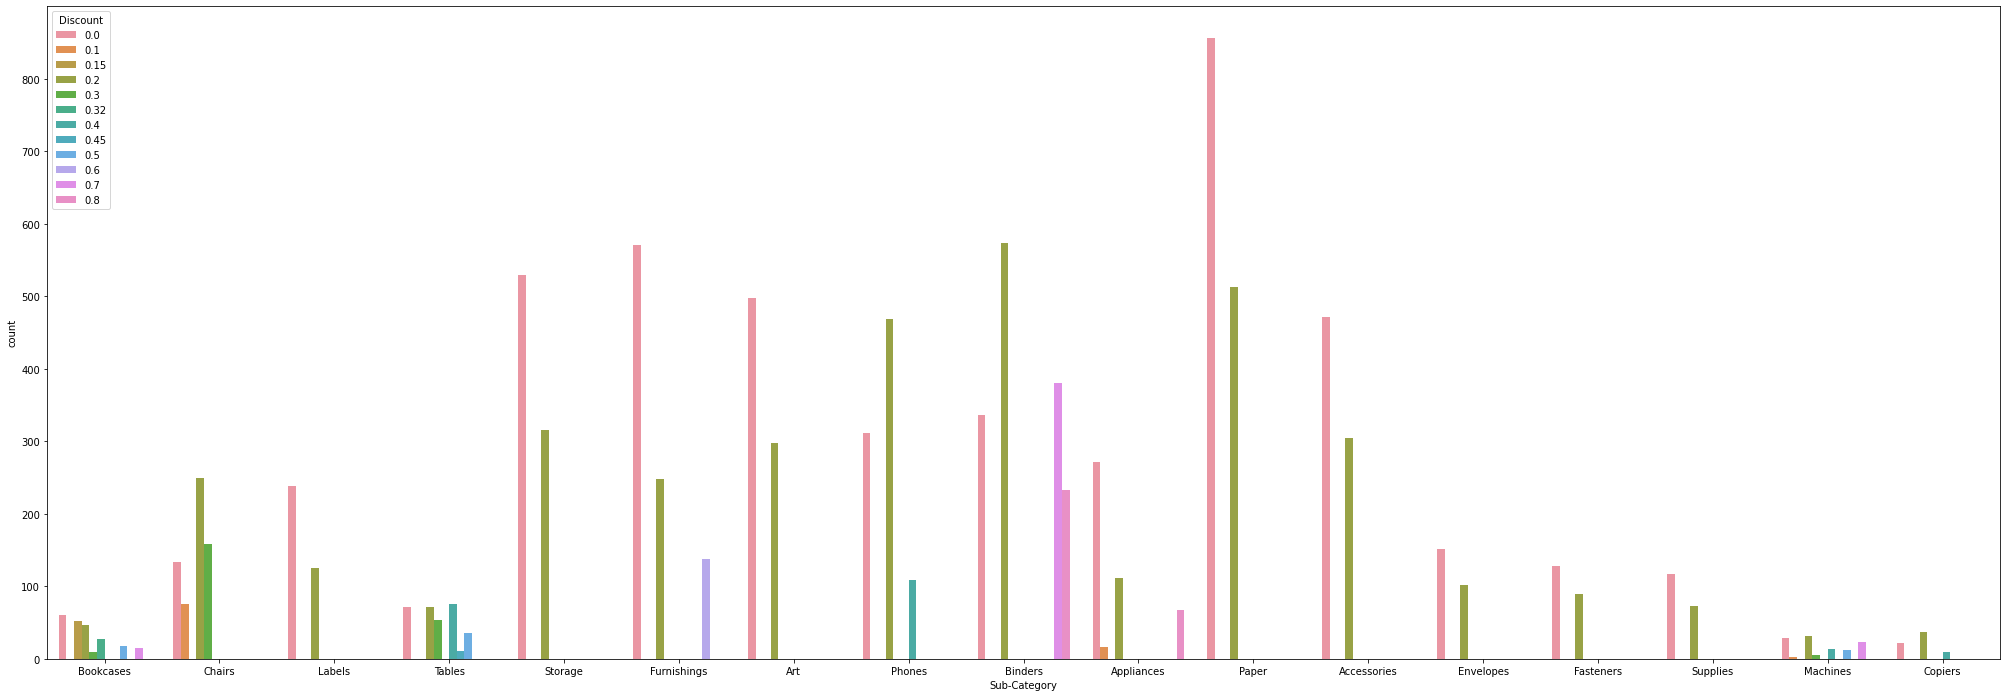

In [ ]:
plt.figure(figsize= (35,12))
sns.countplot("Sub-Category", hue = "Discount", data = data)

- **We notice Products like Chairs, Tables, Phones, Binders,Copiers are more prefered under discount. And products like Paper, and Storage are preffered with any discount so discount on such products can be last priority.**

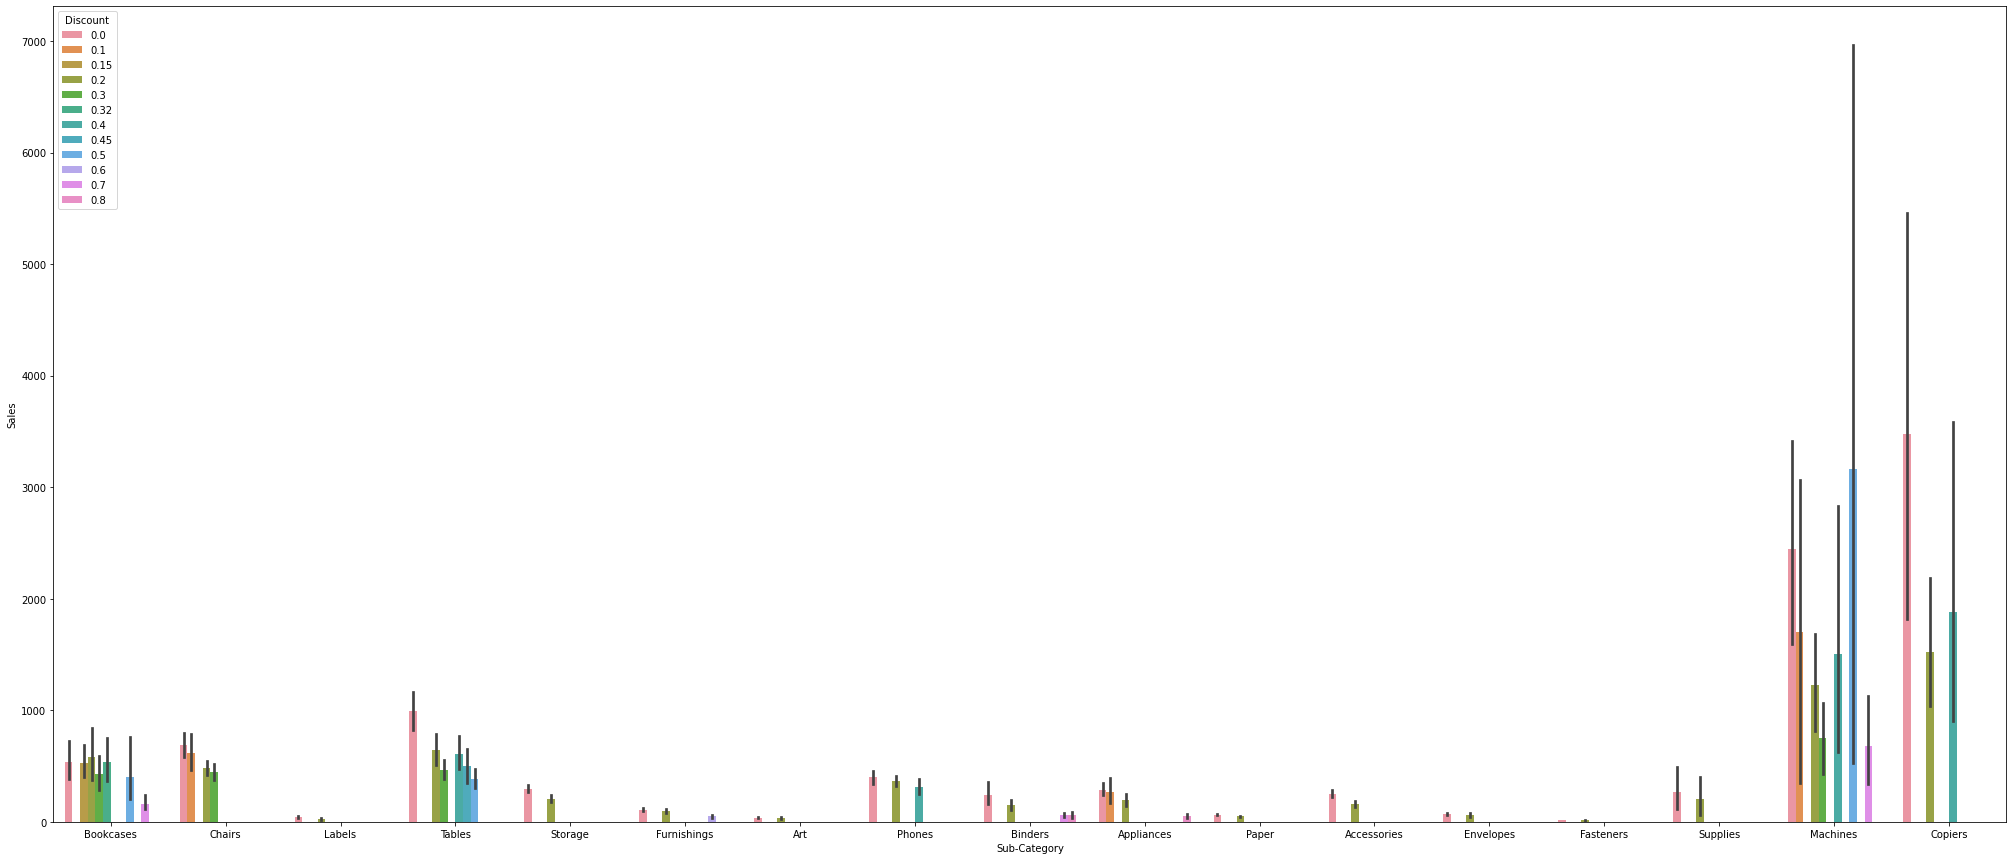

In [ ]:
plt.figure(figsize=(35,15))
sns.barplot(x = "Sub-Category", y = "Sales", hue="Discount", data = data)

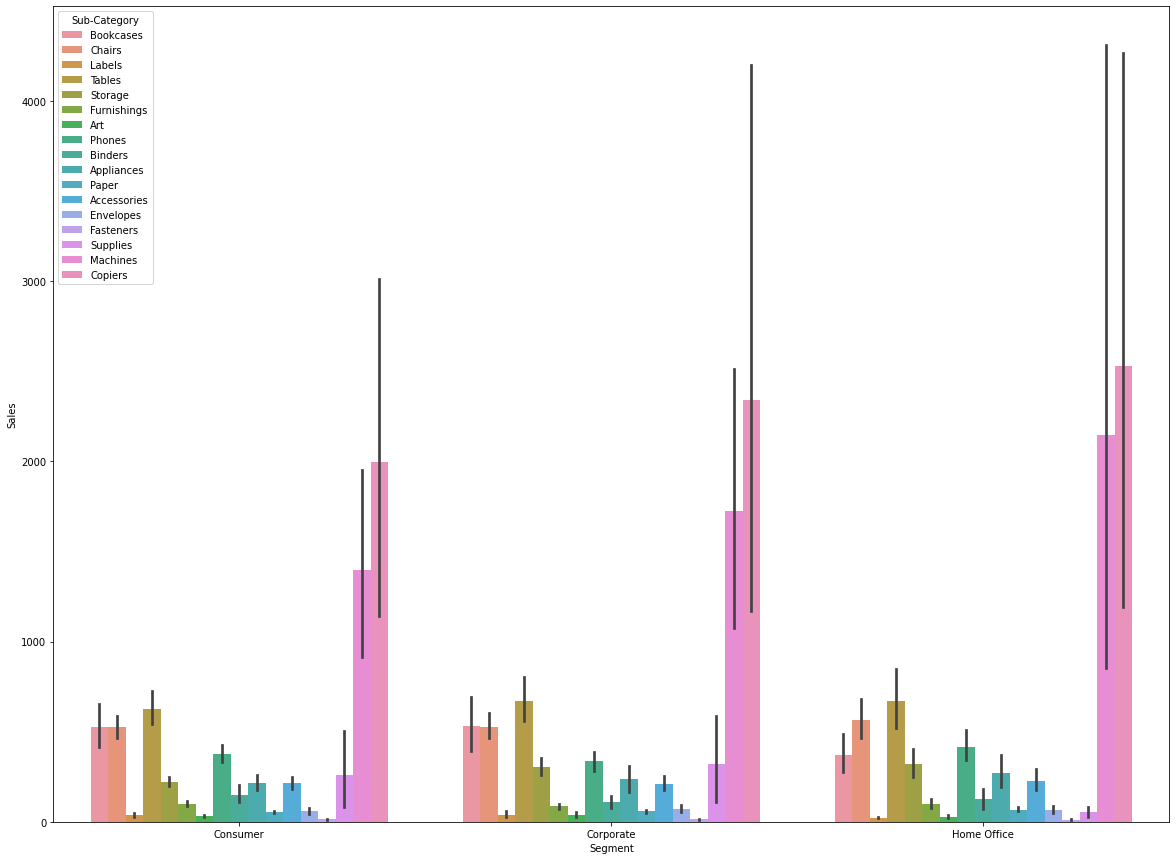

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x = "Segment", y = "Sales", hue="Sub-Category", data = data)

- **As we can see In home Office segment Bookcases and Supplies are less sold compared to other 2 categories.** 

**<h4> Which are the most profitable Category and Sub-Category?**

In [ ]:
profit_cat = pd.DataFrame(data.groupby(["Category", "Sub-Category"]).sum()["Profit"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f931ef6a0>],
      dtype=object)

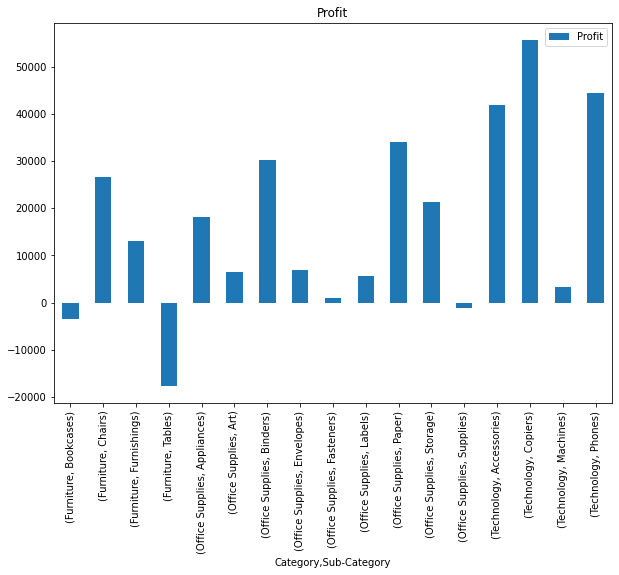

In [ ]:
profit_cat.plot(kind = "bar", subplots = True, figsize = (10,7))

- **We see that in Furniture type Tables and Bookcases are not causing any profits.** 

- **In Technology department, Copiers give the highest profit.**

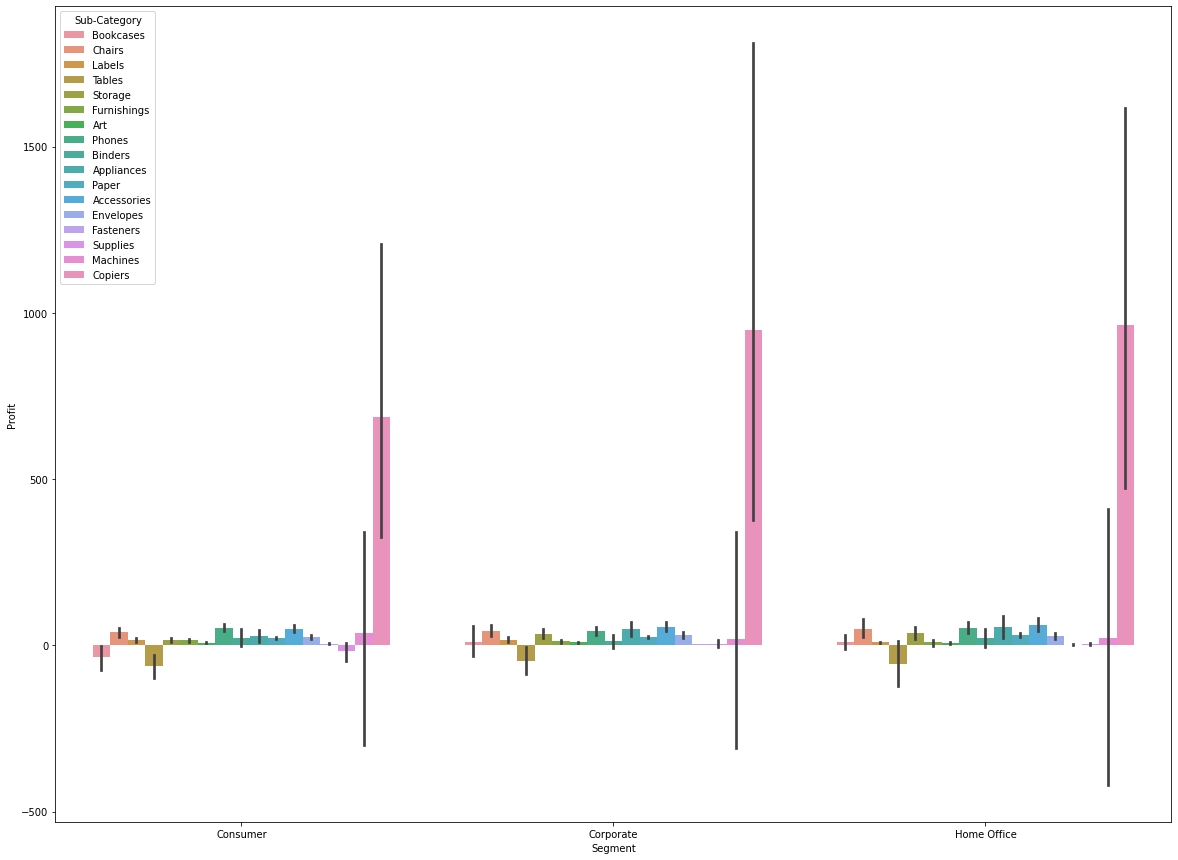

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x = "Segment", y = "Profit", hue="Sub-Category", data = data)

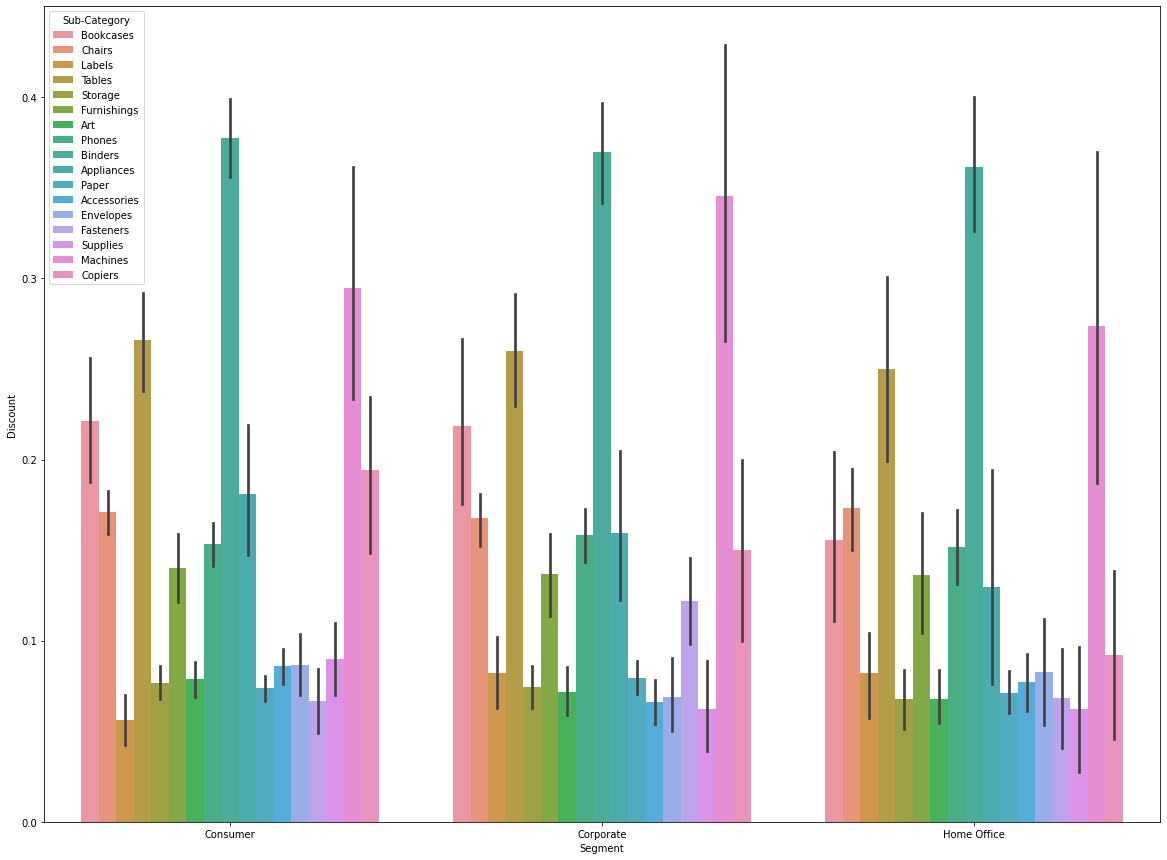

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x = "Segment", y = "Discount", hue="Sub-Category", data = data)

In [ ]:
profit_cat.sort_values(["Category", "Profit"],ascending=False)

Profit
Category        Sub-Category            
Technology      Copiers       55617.8249
                Phones        44515.7306
                Accessories   41936.6357
                Machines       3384.7569
Office Supplies Paper         34053.5693
                Binders       30221.7633
                Storage       21278.8264
                Appliances    18138.0054
                Envelopes      6964.1767
                Art            6527.7870
                Labels         5546.2540
                Fasteners       949.5182
                Supplies      -1189.0995
Furniture       Chairs        26590.1663
                Furnishings   13059.1436
                Bookcases     -3472.5560
                Tables       -17725.4811

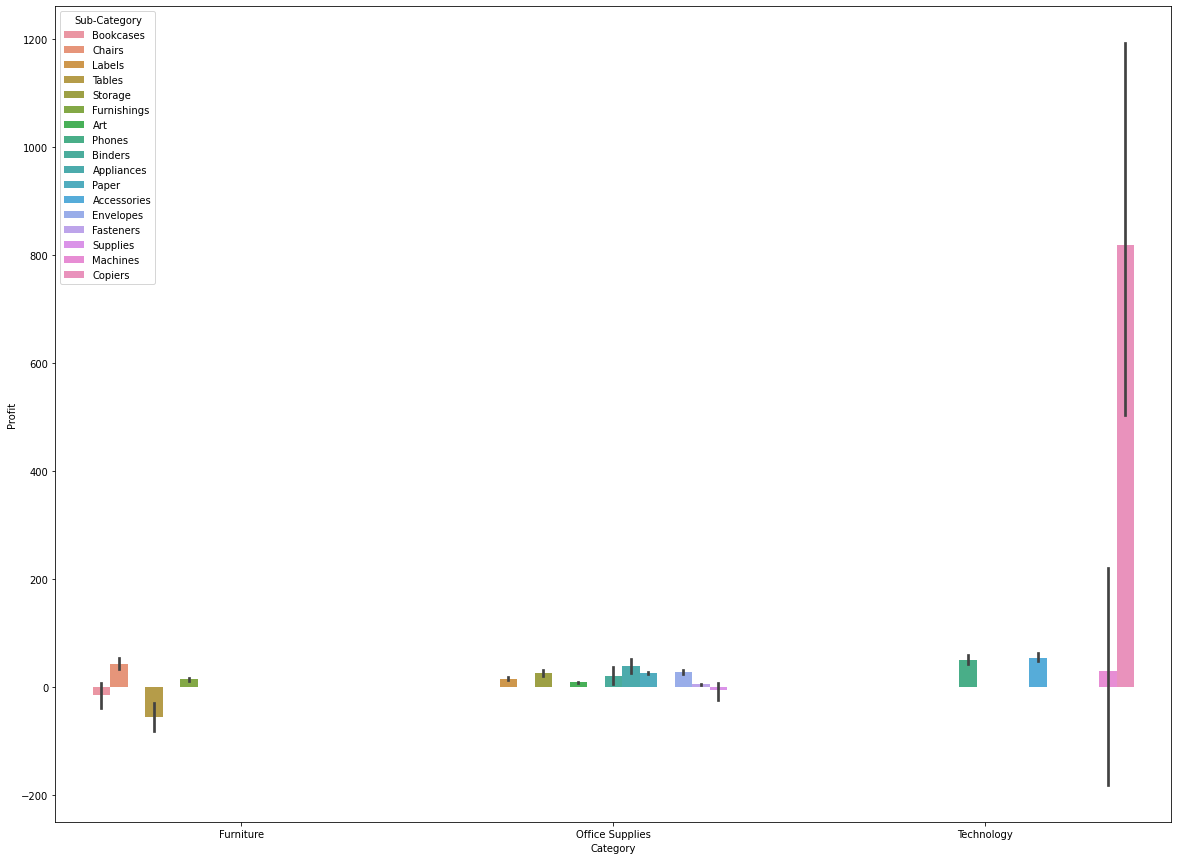

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x = "Category", y = "Profit", hue="Sub-Category", data = data)

**<h4> Pie charts fro better understanding.**

In [ ]:
cat_profit = pd.DataFrame(data.groupby("Category").sum()["Profit"])
print(cat_profit)

                      Profit
Category                    
Furniture         18451.2728
Office Supplies  122490.8008
Technology       145454.9481


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f92a8add8>],
      dtype=object)

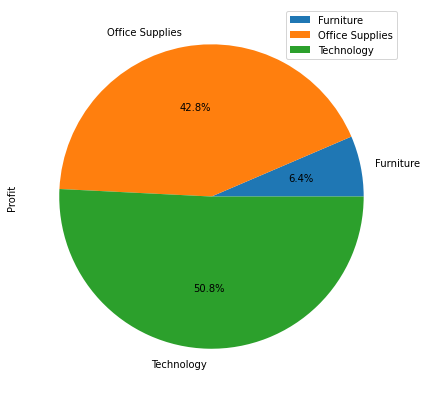

In [ ]:
cat_profit.plot(kind="pie", subplots=True, figsize = (7,7), autopct = "%0.1f%%")

In [ ]:
segment_profit = pd.DataFrame(data.groupby("Segment").sum()["Profit"])
print(segment_profit)

                  Profit
Segment                 
Consumer     134119.2092
Corporate     91979.1340
Home Office   60298.6785


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f92933630>],
      dtype=object)

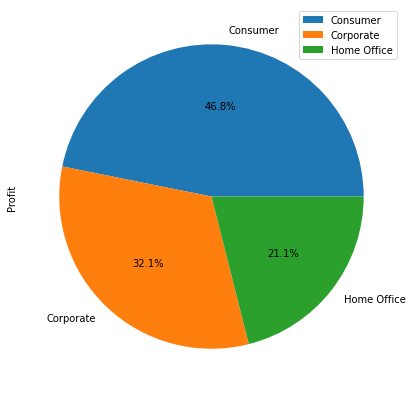

In [ ]:
segment_profit.plot(kind="pie", subplots=True, figsize = (7,7), autopct = "%0.1f%%")

- **Consumer Segment gives us most profits (Almost 50%)**

In [ ]:
SortData = pd.DataFrame(data.groupby(["Ship Mode", "Segment", "Region", "Category"])["Profit"].agg(["size", 'sum']))

In [ ]:
#Saving the Sortdata.
SortData.to_csv(r'/content/drive/MyDrive/Intership/Task 3/SortData.csv', index=True, header = True)

In [ ]:
SortData.rename(columns = {"size": "Quantity"}, inplace=True)

In [ ]:
SortData.rename(columns = {"sum": "Profit"}, inplace=True)

In [ ]:
corelation = data.corr()

In [ ]:
print(corelation)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


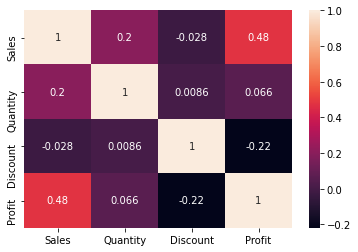

In [ ]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels = corelation.columns, annot=True)

We can see Discount and Profit is negativly corelated.

Also, Similar we can see Sales and Profit is positively corelated. 

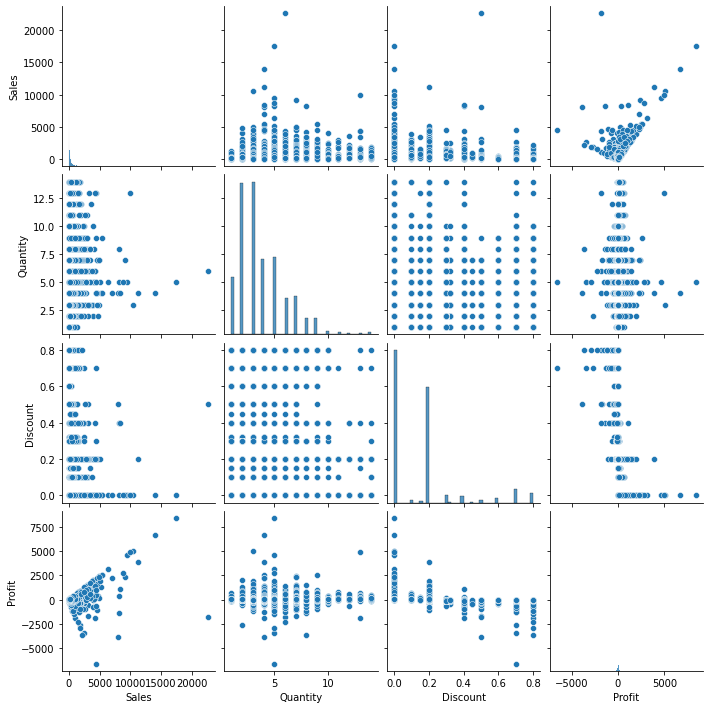

In [ ]:
sns.pairplot(data)

In [ ]:
Shipdf = data.iloc[:,[0,-1]]

In [ ]:
Shipdf.head()

,Ship Mode,Profit
0,Second Class,41.9136
1,Second Class,219.5820
2,Second Class,6.8714
3,Standard Class,-383.0310
4,Standard Class,2.5164


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
Shipdf["Ship Mode"] = labelencoder_X.fit_transform(Shipdf["Ship Mode"])
#Defining an extra column _encoded to store the converted value and the printing both and compare both to find out the assigned value. 
print(Shipdf)

      Ship Mode    Profit
0             2   41.9136
1             2  219.5820
2             2    6.8714
3             3 -383.0310
4             3    2.5164
...         ...       ...
9989          2    4.1028
9990          3   15.6332
9991          3   19.3932
9992          3   13.3200
9993          2   72.9480

[9994 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


From the above code cell, we changed Categorical data to Numerical. 

And we can see the Numerical Values assigned as follows:

Second Class - 2

Standard Class - 3 

First Class - 0

Same Day - 1



In [ ]:
Shipct = ColumnTransformer([("Ship Mode", OneHotEncoder(), [0])], remainder = "passthrough")
Shipdf = Shipct.fit_transform(Shipdf)
print(Shipdf)

[[  0.       0.       1.       0.      41.9136]
 [  0.       0.       1.       0.     219.582 ]
 [  0.       0.       1.       0.       6.8714]
 ...
 [  0.       0.       0.       1.      19.3932]
 [  0.       0.       0.       1.      13.32  ]
 [  0.       0.       1.       0.      72.948 ]]


In [ ]:
Shipdf = pd.DataFrame(Shipdf) #Convert it back to dataframe to work on it. 

In [ ]:
Shipdf.head()

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,41.9136
1,0.0,0.0,1.0,0.0,219.5820
2,0.0,0.0,1.0,0.0,6.8714
3,0.0,0.0,0.0,1.0,-383.0310
4,0.0,0.0,0.0,1.0,2.5164


In [ ]:
Shipcor = Shipdf.corr()
print(Shipcor)

          0         1         2         3         4
0  1.000000 -0.102225 -0.209645 -0.519246  0.005795
1 -0.102225  1.000000 -0.117828 -0.291836  0.000624
2 -0.209645 -0.117828  1.000000 -0.598503  0.001844
3 -0.519246 -0.291836 -0.598503  1.000000 -0.006040
4  0.005795  0.000624  0.001844 -0.006040  1.000000


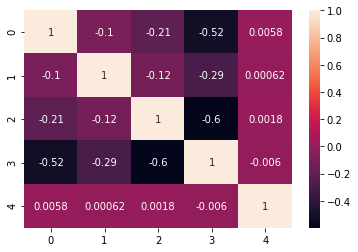

In [ ]:
sns.heatmap(Shipcor, xticklabels=Shipcor.columns, yticklabels = Shipcor.columns, annot=True)

Second Class - 2

Standard Class - 3

First Class - 0

Same Day - 1

From this and the heatmap we can say 


*   All except Standard Class Shipment and Profit are negatively correlated.




In [ ]:
Shipdf.head()

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,41.9136
1,0.0,0.0,1.0,0.0,219.5820
2,0.0,0.0,1.0,0.0,6.8714
3,0.0,0.0,0.0,1.0,-383.0310
4,0.0,0.0,0.0,1.0,2.5164


In [ ]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


- **<h3>Top 5 States with highest Sales**

In [ ]:
StateData = pd.DataFrame(data.groupby("State").agg({"Sales":"sum", "Profit":"sum"}))
StateSales = StateData.sort_values("Sales", ascending=False)
StateSales.head()

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Texas,170188.0458,-25729.3563
Washington,138641.2700,33402.6517
Pennsylvania,116511.9140,-15559.9603


- **<h4> Top 5 States with highest Profit Returns**

In [ ]:
StateProfit = StateData.sort_values("Profit", ascending = False)
StateProfit.head()

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Washington,138641.2700,33402.6517
Michigan,76269.6140,24463.1876
Virginia,70636.7200,18597.9504
